# Transfer Learning on Images of Plant-Village Dataset




### Transfer Learning 

Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. 

We will be using the following CNN based algorithm pre-defined in the keras library:

In [1]:
from IPython.display import Image

###  ResNet50

ResNet was born from a simple observation: why do very deep nets perform worse as you keep adding layers? Intuitively, deeper nets should perform no worse than their shallower counterparts, at least at train time (when there is no risk of overfitting). In practice, however, these deeper nets almost always degrade in performance.
The authors of ResNet boiled these problems down to a single hypothesis: direct mappings are hard to learn. And they proposed a fix: instead of trying to learn an underlying mapping from x to H(x), learn the difference between the two, or the “residual.” Then, to calculate H(x), we can just add the residual to the input.
Say the residual is F(x)=H(x)-x. Now, instead of trying to learn H(x) directly, our nets are trying to learn F(x)+x. This gives rise to the famous ResNet (or “residual network”) block you have probably seen:

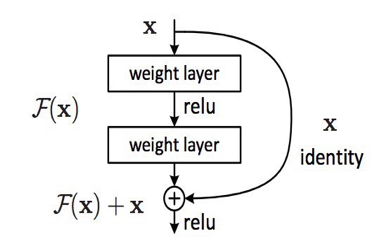

In [2]:
Image('images/resnet_block.png')

Each “block” in ResNet consists of a series of layers and a “shortcut” connection adding the input of the block to its output. The “add” operation is performed element-wise, and if the input and output are of different sizes, zero-padding or projections (via 1x1 convolutions) can be used to create matching dimensions.

ResNet50, with 50 weight layers, is built on the above-mentioned micro-architecture modules also known as network-in-network architectures. Micro-architecture can also be viewed as the set of “building blocks” utilized for construction of a network. Updating the residual module for using identity mappings can help in obtaining better accuracy. ResNet50 being deeper than VGG16 & VGG19, the model size is remarkably smaller, as fully-connected layers have been replaced by the utilization of global average pooling— this significantly reduces the network size to 99MB for ResNet50. 

### Inception_ResNet_V2

Inspired by the performance of the ResNet, a hybrid inception module was proposed. The latest version of Inception, v4, threw in residual connections within each module, creating an Inception-ResNet hybrid. There are two sub-versions of Inception ResNet, namely v1 and v2. 
The premise for Inception-ResNet hybrid was to introduce residual connections that add the output of the convolution operation of the inception module, to the input. For residual addition to work, the input and output after convolution must have the same dimensions. Hence, we use 1x1 convolutions after the original convolutions, to match the depth sizes (Depth is increased after convolution).

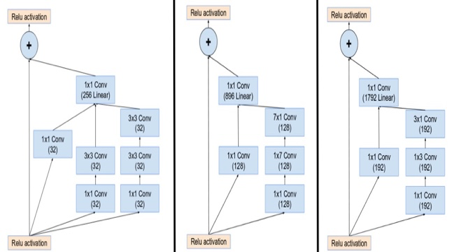

In [3]:
Image('images/Inception1.png')

The pooling operation inside the main inception modules was replaced in favor of the residual connections. However, you can still find those operations in the reduction blocks. Reduction block A is same as that of Inception v4.

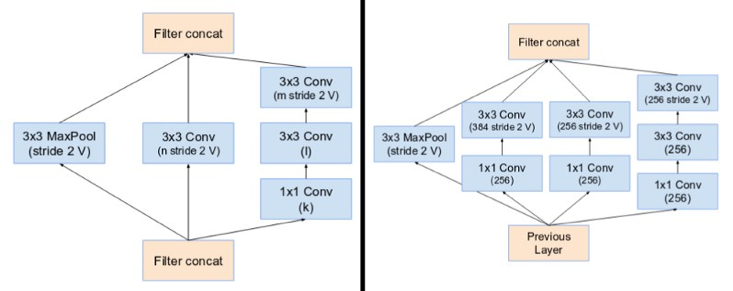

In [4]:
Image('images/Inception3.png')

Networks with residual units deeper in the architecture caused the network to “die” if the number of filters exceeded 1000. Hence, to increase stability, the authors scaled the residual activations by a value of around 0.1 to 0.3.

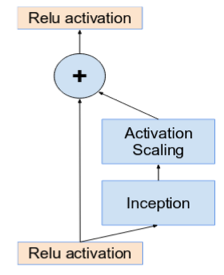

In [5]:
Image('images/Inception4.png')

Findings:<br>
•	Activations are scaled by a constant to prevent the network from dying. <br>
•	It was found that Inception-ResNet models were able to achieve higher accuracies at a lower epoch.<br>
•	The final network layout for both Inception v4 and Inception-ResNet are as follows:

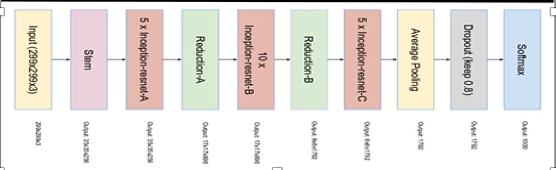

In [6]:
Image('images/Inception5.png')

Properties:<br>
•	Modules A, B and C are similar. <br>
•	Each branch starts with a 1x1 convolution on the input. <br>
•	All branches merge into one 1x1 convolution (which is then added to the original input, as usually in residual architectures). <br>
•	Module A uses 3x3 convolutions, B 7x1 and 1x7, C 3x1 and 1x3.<br> 
•	The reduction modules also contain multiple branches. One has max pooling (3x3 stride 2), the other branches end in convolutions with stride 2.<br>



### VGG 16 & 19

This architecture is from VGG group, Oxford. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3X3 kernel-sized filters one after another. With a given receptive field (the effective area size of input image on which output depends), multiple stacked smaller size kernel is better than the one with a larger size kernel because multiple non-linear layers increases the depth of the network which enables it to learn more complex features, and that too at a lower cost. 
The network architecture is given in the table.


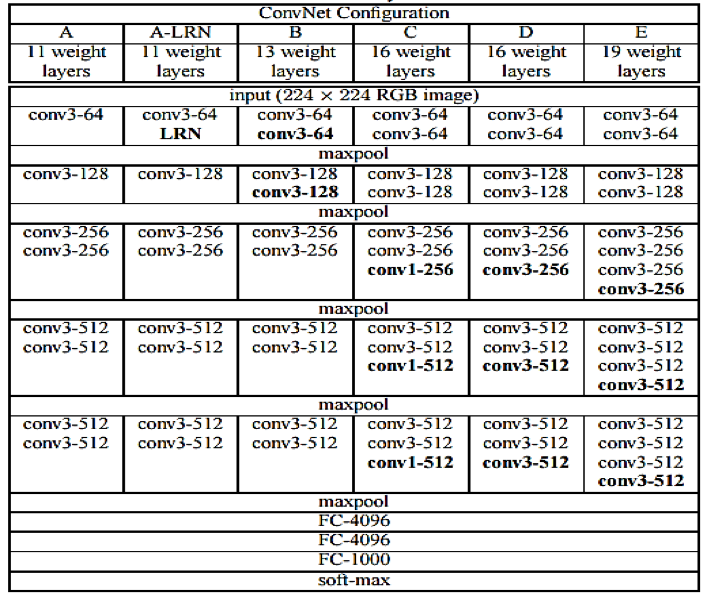

In [7]:
Image('images/VGG.png')

You can see that in VGG-D and VGG-E, there are blocks with same filter size applied multiple times to extract more complex and representative features. This concept of blocks/modules became a common theme in the networks after VGG.
The VGG convolutional layers are followed by 3 fully connected layers. The width of the network starts at a small value of 64 and increases by a factor of 2 after every sub-sampling/pooling layer. It achieves the top-5 accuracy of 92.3 % on ImageNet. The numbers ‘16’ and ‘19’ that are included in the names, represent the number of weight layers in the network. Deployment of VGG networks is tedious due to inherently slow training speeds and large architecture weights


### Xception

Xception stands for “extreme inception.” And, as the name suggests, it takes the principles of Inception to an extreme. The hypothesis is: “cross-channel correlations and spatial correlations are sufficiently decoupled that it is preferable not to map them jointly.” In a traditional convolution network, convolutional layers seek out correlations across both space and depth. 
In Inception, we began separating the two slightly. We used 1x1 convolutions to project the original input into several separate, smaller input spaces, and from each of those input spaces, we used a different type of filter to transform those smaller 3D blocks of data. Xception takes this one step further. Instead of partitioning input data into several compressed chunks, it maps the spatial correlations for each output channel separately and then performs a 1x1 depth wise convolution to capture cross-channel correlation.

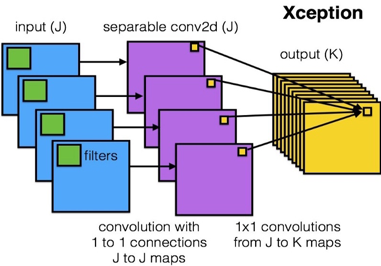

In [8]:
Image('images/Xception.png')

The author notes that this is essentially equivalent to an existing operation known as a “depth wise separable convolution,” which consists of a depth wise convolution (a spatial convolution performed independently for each channel) followed by a pointwise convolution (a 1x1 convolution across channels). We can think of this as looking for correlations across a 2D space first, followed by looking for correlations across a 1D space. Intuitively, this 2D + 1D mapping is easier to learn than a full 3D mapping.
Xception exercises the smallest weight serialization at only 91MB. Xception, when trained on ImageNet dataset for image classification significantly outperformed InceptionV3, due to the efficient usage of model parameters and incorporation of depthwise separable convolution operation instead of Inception modules. Most importantly, it has the same number of model parameters as Inception, implying a greater computational efficiency.


### Data Source

Pre-Requisites: You should have the following libraries:
1. Tensorflow version: 1.10.0
2. Keras version: 2.2.2

If you want to run the program on the Plant-Village dataset do the following steps, 
1. Create a 'color' named folder in the same folder as your code.
2. Clone this repo: git clone https://github.com/spMohanty/PlantVillage-Dataset
3. In this repo folder go to the PlantVillage-Dataset/raw/color folder
4. Copy all the folders of the classes related to the fruit dataset that you need, and paste it in the Step 1 color folder 
5. Run the code for the algorithm of your choice.

### Importing Library and Models 

In [1]:
from __future__ import print_function

#for Resnet 50
from keras.applications.resnet50 import ResNet50, preprocess_input

#for Inception_Resnet
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

#for VGG16
#from keras.applications.vgg16 import VGG16, preprocess_input

#for VGG19
#from keras.applications.vgg19 import VGG19, preprocess_input

#for Xception
#from keras.applications.xception import Xception, preprocess_input

from keras.layers import Input, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import f1_score
from keras.layers.core import Dense, Activation, Flatten, Dropout
import math
from keras import optimizers
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.regularizers import l2
import codecs
import sklearn.metrics as sklm
from keras.utils.np_utils import to_categorical
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import sys

import os
import cv2
import numpy as np
import scipy.misc as sm

Using TensorFlow backend.


### Loading the Data [7] 

In [2]:
#loading the data from the folder
ls1=os.listdir('color')

if '.DS_Store' in ls1:
    ls1.remove('.DS_Store')

print(ls1)

dic1={}
count=0

#taking the count of the files
for idx,i in enumerate(ls1):
    dic1[i]=idx
    ls2=os.listdir('color/'+i)
    if '.DS_Store' in ls2:
        ls2.remove('.DS_Store')
    for j in ls2:
        count=count+1
        
print("Reach 1 \n")
ls1=os.listdir('color')
if '.DS_Store' in ls1:
    ls1.remove('.DS_Store')

dic1={}
X=np.zeros((count,256,256,3))
Y=np.zeros((count,1))
vap=0

#Putting images and labels in X and Y
for idx,i in enumerate(ls1):
    dic1[i]=idx
    ls2=os.listdir('color/'+i)
    if '.DS_Store' in ls2:
        ls2.remove('.DS_Store')
    for idx2,j in enumerate(ls2):
        X[vap, :, :, :]=cv2.imread('color/'+i+'/'+j)
        Y[vap,0]=idx
        vap=vap+1

['Apple___Cedar_apple_rust', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy']
Reach 1 



### Defining Metric Functions [7]  

In [3]:
class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.confusion = []
        self.precision = []
        self.recall = []
        self.f1s = []

    def on_epoch_end(self, epoch, logs={}):
        score = np.asarray(self.model.predict(self.validation_data[0]))
        predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
        targ = self.validation_data[1]

        self.f1s.append(sklm.f1_score(targ, predict,average='micro'))
        self.confusion.append(sklm.confusion_matrix(targ.argmax(axis=1),predict.argmax(axis=1)))

        return

### Setting Hyper-parameters 


Here we are setting the hyper-parameters, so lets define them first:<br>
batch_size: the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.<br>
num_classes: number of classes in your classification<br>
epochs:number of epochs where one epoch = one forward pass and one backward pass of all the training examples

In [4]:
#Hyperparameters
batch_size = 64
num_classes = len(dic1)
epochs = 30

# input image dimensions [7] 
img_rows, img_cols = 256, 256
h = 299
w = 299
ch = 3
print("Reach 2.5 \n")
#tensor. will receive cifar10 images as input, gets passed to resize_images 
img_placeholder = tf.placeholder("uint8", (None, 256, 256, 3))

#tensor. resized images. gets passed into Session()
resize_op = tf.image.resize_images(img_placeholder, (h, w), method=0)

Reach 2.5 



### Defining Pre-processing Images function and the Models 

Here I tried adding diffrent layers like Dropout, but the results didn't change significantly. However, one can try adding more layers to the model.<br>
Here you can choose the model you want to run by simply un-commenting the lines of code for the model.

In [5]:
# create a generator for batch processing
# this gen is written as if you could run through ALL of the data
# AWS instance doesn't have enough memory to hold the entire training bottleneck in memory
# so we will call for 10000 samples when we call it
def gen(session, data, labels, batch_size):
    def _f():
        start = 0
        end = start + batch_size
        n = data.shape[0]
        max_iter = math.ceil(n/batch_size)
        while True:
            # run takes in a tensor/function and performs it.
            # almost always, that function will take a Tensor as input
            # when run is called, it takes a feed_dict param which translates
            # Tensors into actual data/integers/floats/etc
            # this is so you can write a network and only have to change the
            # data being passed in one place instead of everywhere
            for i in range(0,max_iter):
                # X_batch is resized
                X_batch = session.run(resize_op, {img_placeholder: data[start:end]})
                # X_batch is normalized
                X_batch = preprocess_input(X_batch)
                y_batch = labels[start:end]
                start += batch_size
                end += batch_size

                yield (X_batch, y_batch)

    return _f
#for Resnet 50 [7] 
def create_model_resnet():
    #create input tensor
    input_tensor = Input(shape=(h, w, ch))
    #set the model
    model = ResNet50(input_tensor=input_tensor, include_top=False)
    return model

#for Inception_ResNet
# def create_model_inception_resnet_v2():
#     #create input tensor
#     input_tensor = Input(shape=(h, w, ch))
#     #set the model
#     model = InceptionResNetV2(input_tensor=input_tensor, include_top=False)
#     return model

#for VGG16
# def create_model_vgg():
#     #create input tensor
#     input_tensor = Input(shape=(h, w, ch))
#     #set the model
#     model = VGG16(input_tensor=input_tensor, include_top=False)
#     return model

#for VGG19
# def create_model_vgg_19():
#     #create input tensor
#     input_tensor = Input(shape=(h, w, ch))
#     #set the model
#     model = VGG19(input_tensor=input_tensor, include_top=False)
#     return model

#for Xception
# def create_model_xception():
#     #create input tensor
#     input_tensor = Input(shape=(h, w, ch))
#     #set the model
#     model = Xception(input_tensor=input_tensor, include_top=False)
#     return model

print("Reach 2.8 \n")

Reach 2.8 



### Splitting the data into Train and Test 

Here we are splitting the data into Train and Test data in a 70:30 ratio respectively.

In [6]:
X_train1, X_val1, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True)
print("Reach 3 \n")
print(X_train1.shape)
print(y_train.shape)

Reach 3 

(2219, 256, 256, 3)
(2219, 1)


### Training the model on the dataset 

Here we are calling the model, and training it on the train and test dataset. All you need to do is un-comment the model's calling function that you have chosen earlier.

In [7]:
with tf.Session() as sess:
    K.set_session(sess)
    K.set_learning_phase(1)
    
    #for Resnet 50 [7] 
    model = create_model_resnet()                         #call the model function

    #for Inception_ResNet
#   model = create_model_inception_resnet_v2()            #call the model function

    #for VGG16
#   model = create_model_vgg()                            #call the model function

    #for VGG19
#   model = create_model_vgg_19()                         #call the model function

    #for Xception
#   model = create_model_xception()                       #call the model function

    train_gen = gen(sess, X_train1, y_train, batch_size)  #pre-process the train data
    
    X_train = model.predict_generator(train_gen(), 64)    #implement model on train data
    print("conv to train list complete")
    

    val_gen = gen(sess, X_val1, y_val, batch_size)        #pre-process the test data
    
    X_val = model.predict_generator(val_gen(), 64)        #implement model on test data
    print("conv to val list complete")
    
print("Reach 4 \n")

y_train = to_categorical(y_train, num_classes= num_classes)
y_val = to_categorical(y_val,num_classes = num_classes)

print("Reach 4 end \n")

conv to train list complete
conv to val list complete
Reach 4 

Reach 4 end 



### Creating the Final Layer 

Here we are creating and adding the final layer to the above trained model according to the number of classes in the dataset. Moreover, the following are the hyper-parameters that are being set:<br>
1. Activation function(activation,final_layer_activation): It’s just a thing (node) that you add to the output end of any neural network. It is also known as Transfer Function. It can also be attached in between two Neural Networks. It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc.(depending upon the function). eg.: relu, tanh, softmax etc.
2. compile_loss:A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model, helps with the calculation of model losses. eg. mse, cross-entropy etc.
3. learning_rate: Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region. Also, if we take a higher value of learning rate, it might result in overfitting of the model as less number of points will be considered.
4. optimizer:An optimizer is one of the two arguments required for compiling a model, helps with calculation of gradients for the model. eg. SGD, Adadelta etc.

In [8]:
# Adding final layer [7] 
input_shape = X_train.shape[1:]
inp = Input(shape=input_shape)
x = Flatten()(inp)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inp, x)
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

metrics = Metrics() #calling the Metrics function

### Fitting the model 

Here we are fitting the model and getting the final results. The following are the results for the ResNet50 model on the Apple dataset. Similarly results for the other models for other datatsets can be acheived.

Train on 2219 samples, validate on 952 samples
Epoch 1/30
2219/2219 [==============================] - 6s 3ms/step - loss: 0.8449 - acc: 0.7972 - val_loss: 0.1807 - val_acc: 0.9454
Epoch 2/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0314 - acc: 0.9901 - val_loss: 0.1207 - val_acc: 0.9632
Epoch 3/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0074 - acc: 0.9995 - val_loss: 0.1169 - val_acc: 0.9611
Epoch 4/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.1107 - val_acc: 0.9622
Epoch 5/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 0.9674
Epoch 6/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1101 - val_acc: 0.9653
Epoch 7/30
2219/2219 [==============================] - 3s 2ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9632
Epoch 8/30
2219

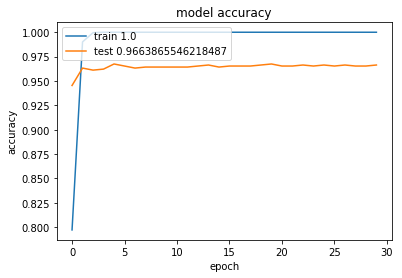

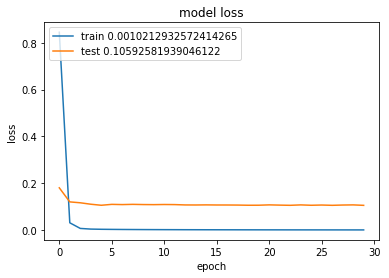

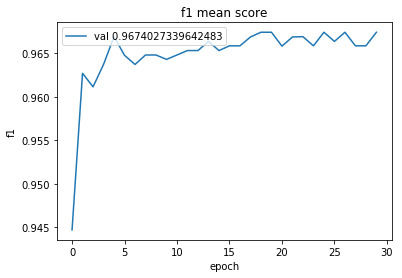

[[ 70   1   0   1]
 [  2 192   1  13]
 [  0   1 193   4]
 [  0   5   4 465]]
Reach End 



In [9]:
with tf.Session() as sess:
    # fetch session so Keras API can work
    K.set_session(sess)
    K.set_learning_phase(1)
    history =model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_data=(X_val, y_val), shuffle=True, verbose=1,callbacks=[metrics] )
    print(metrics.f1s)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print(history.history['acc'])
    
    # summarize history for accuracy [7]
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train ' + str(acc[-1]), 'test ' + str(val_acc[-1])], loc='upper left')
    plt.show()

    # summarize history for loss [7]
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train ' + str(loss[-1]), 'test ' + str(val_loss[-1])], loc='upper left')
    plt.show()

    # # summarize history for f1
    plt.plot(metrics.f1s)
    # plt.plot(history.history['val_f1'])
    plt.title('f1 mean score')
    plt.ylabel('f1')
    plt.xlabel('epoch')
    plt.legend(['val ' + str(metrics.f1s[-1])], loc='upper left')
    plt.show()

    print(metrics.confusion[-1])

print("Reach End \n")

### Results

### Apple Dataset:

#### Graphs

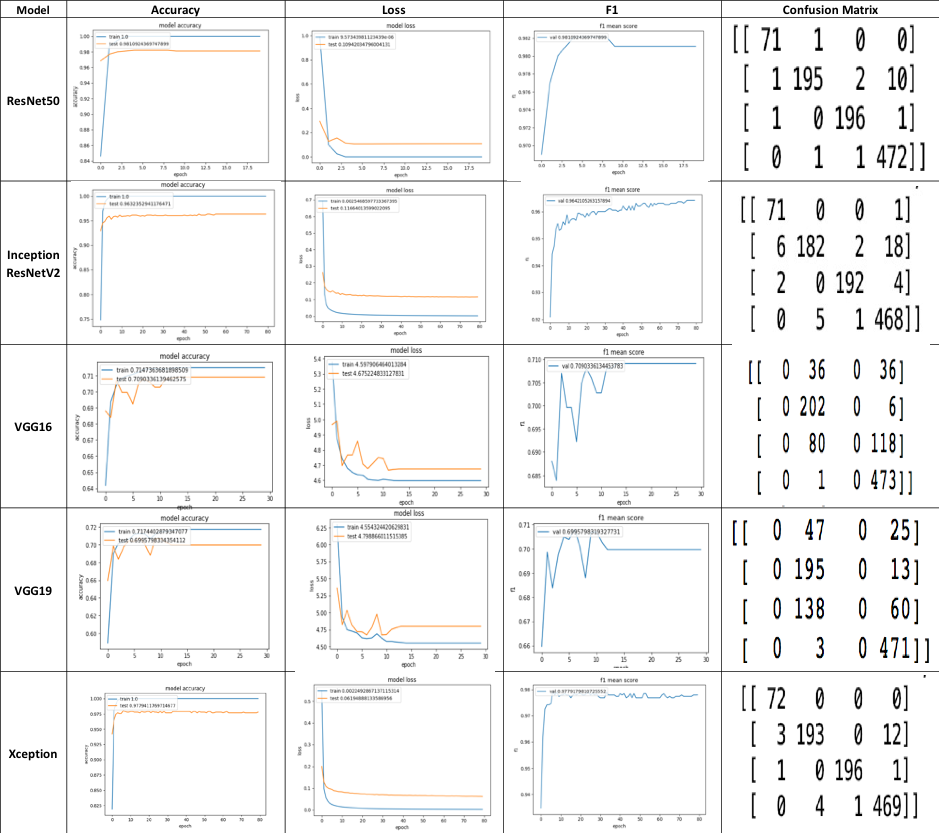

In [9]:
Image('images/apple.png')

#### Accuracy Comparison

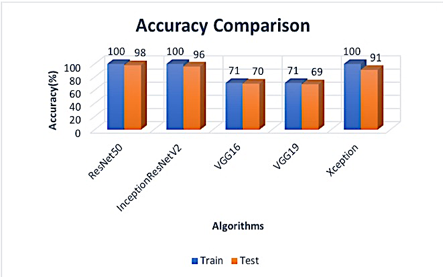

In [10]:
Image('images/apple_acc.png')

#### F1 Score Comparison

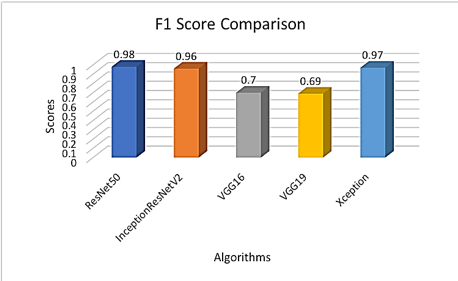

In [11]:
Image('images/apple_f1.png')

### Grape Dataset

#### Graphs

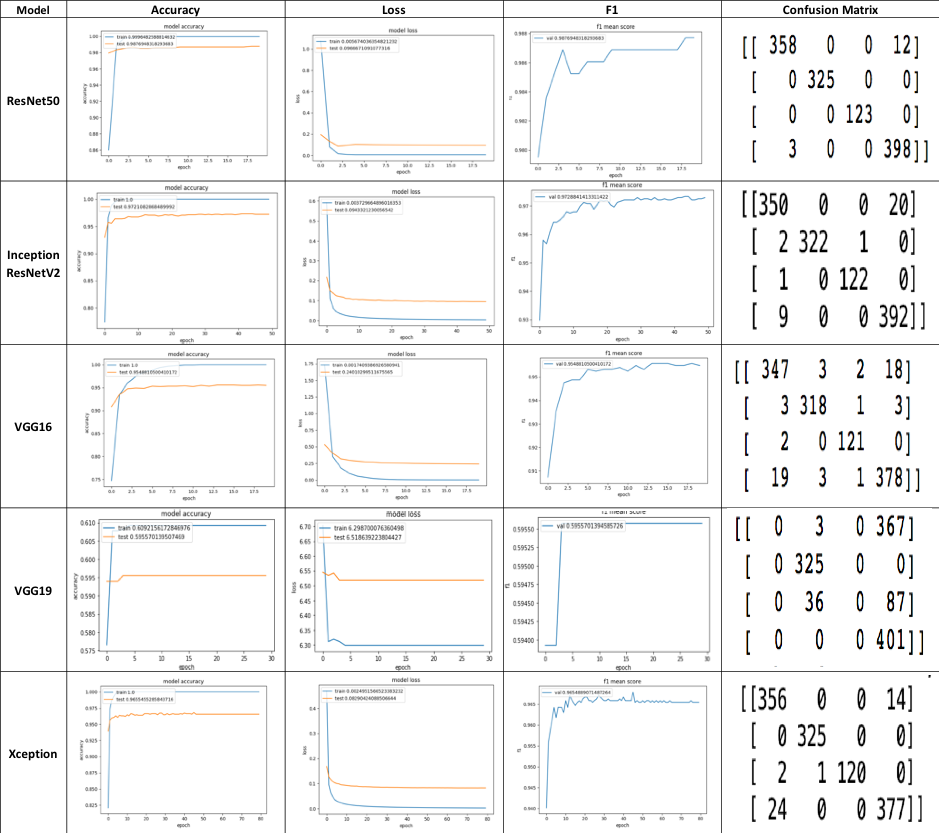

In [12]:
Image('images/grape.png')

#### Accuracy Comparision

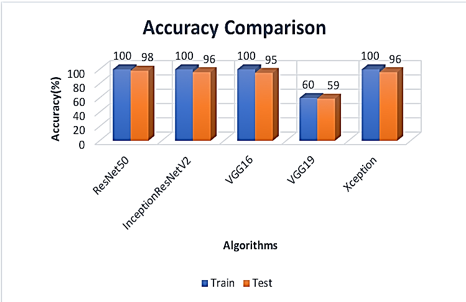

In [13]:
Image('images/grape_acc.png')

#### F1 Score Comparision

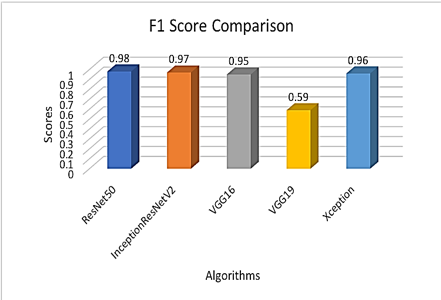

In [14]:
Image('images/grape_f1.png')

### Tomato Dataset

#### Graphs

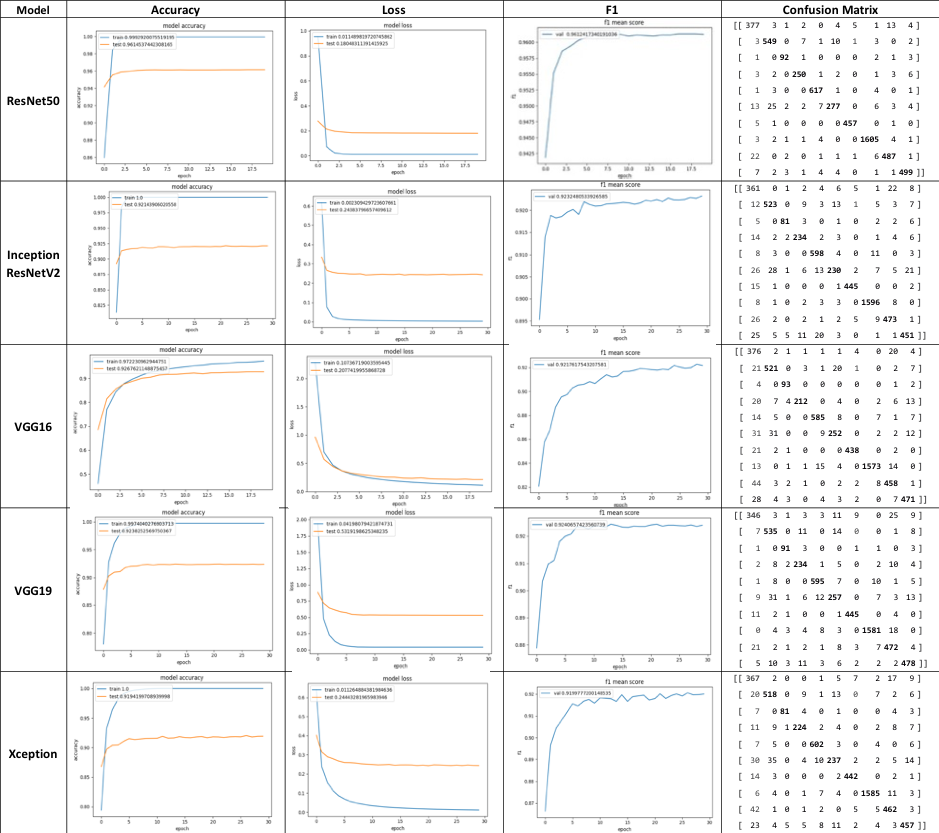

In [15]:
Image('images/tomato.png')

#### Accuracy Comparision

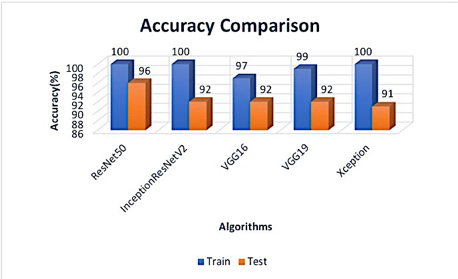

In [16]:
Image('images/tomato_acc.png')

#### F1 Score Comparision

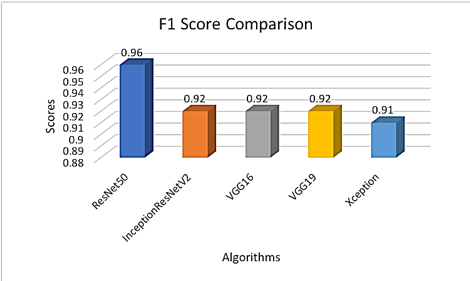

In [17]:
Image('images/tomato_f1.png')

### Conclusion

In this way we can implement transfer learning by importing the pre-defined models, training them on our datasets, creating final layer according to the number of classes and getting the results. By analyzing our results, we can choose which model will be best for transfer learning and implement that on other datasets<br>
The ResNet50 model has the better accuracy and F1 score. This is because, the addition of the residual network blocks and the shortcut connections helped reduce the vanishing gradient problem, which makes it effective.  Moreover, we can also implement Inception_ResNet_V2, which has given similar results, but because of additional computation, it may take a little more time, and there is a probability of overfitting, especially on the larger datasets. VGG16 and VGG 19 are both heavy yet ineffective because of the comparatively less number of layers. Xception model has given great results on the smaller datasets but wasn’t as effective on the larger datasets. This is because, like Inception it is doing additional computation by performing multiple convolutions, which results in decrease in efficiency.

### References

1.	An Intuitive Explanation of Convolutional Neural networks: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
2.	Understanding various architectures of Convolutional Networks: 
https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/
3.	An Intuitive Guide to Deep Network Architectures:
https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41
4.	A Simple Guide to the Versions of the Inception Network:
https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202
5.	Keras: The Python Deep Learning library: 
https://keras.io/
6.	Wikipedia:
https://www.wikipedia.org
7.	Code source:
https://github.com/YashG2002/Tomato-Disease-Detection

### License

MIT License
Copyright (c) 2018 Adbhut Sangal<br>
<br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br><br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.